In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller


hourly_auckland_weather = pd.read_csv("../../AucklandCouncilOpenData_08June24/temp_rain_soil_Auckland_2015-10-21to2024-06-08.csv", index_col='Timestamp (UTC+12:00)', parse_dates=True)
hourly_auckland_weather.head()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950


In [2]:
hourly_auckland_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44946 entries, 2018-07-07 11:00:00 to 2023-08-23 04:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Temp       44946 non-null  float64
 1   Rain(mm)   44946 non-null  float64
 2   SoilMoist  44946 non-null  float64
 3   SoilTemp   44946 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


In [3]:
print(hourly_auckland_weather.head())
print(hourly_auckland_weather.tail())

                       Temp  Rain(mm)  SoilMoist  SoilTemp
Timestamp (UTC+12:00)                                     
2018-07-07 11:00:00    14.0       0.0   37.51600    10.400
2018-07-07 12:00:00    15.0       0.0   37.52375    10.600
2018-07-07 13:00:00    16.0       0.0   37.57200    10.700
2018-07-07 14:00:00    16.0       0.0   37.34300    10.725
2018-07-07 15:00:00    16.0       0.0   37.35050    10.950
                       Temp  Rain(mm)  SoilMoist  SoilTemp
Timestamp (UTC+12:00)                                     
2023-08-23 00:00:00    11.0       0.0   50.77650     11.90
2023-08-23 01:00:00    11.0       0.0   50.82350     11.90
2023-08-23 02:00:00    11.0       0.0   50.82475     11.90
2023-08-23 03:00:00    11.0       0.0   50.85500     11.65
2023-08-23 04:00:00    10.0       0.0   50.95325     11.60


In [4]:
hourly_auckland_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44946 entries, 2018-07-07 11:00:00 to 2023-08-23 04:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Temp       44946 non-null  float64
 1   Rain(mm)   44946 non-null  float64
 2   SoilMoist  44946 non-null  float64
 3   SoilTemp   44946 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


In [5]:
hourly_auckland_weather.isna().sum()

Temp         0
Rain(mm)     0
SoilMoist    0
SoilTemp     0
dtype: int64

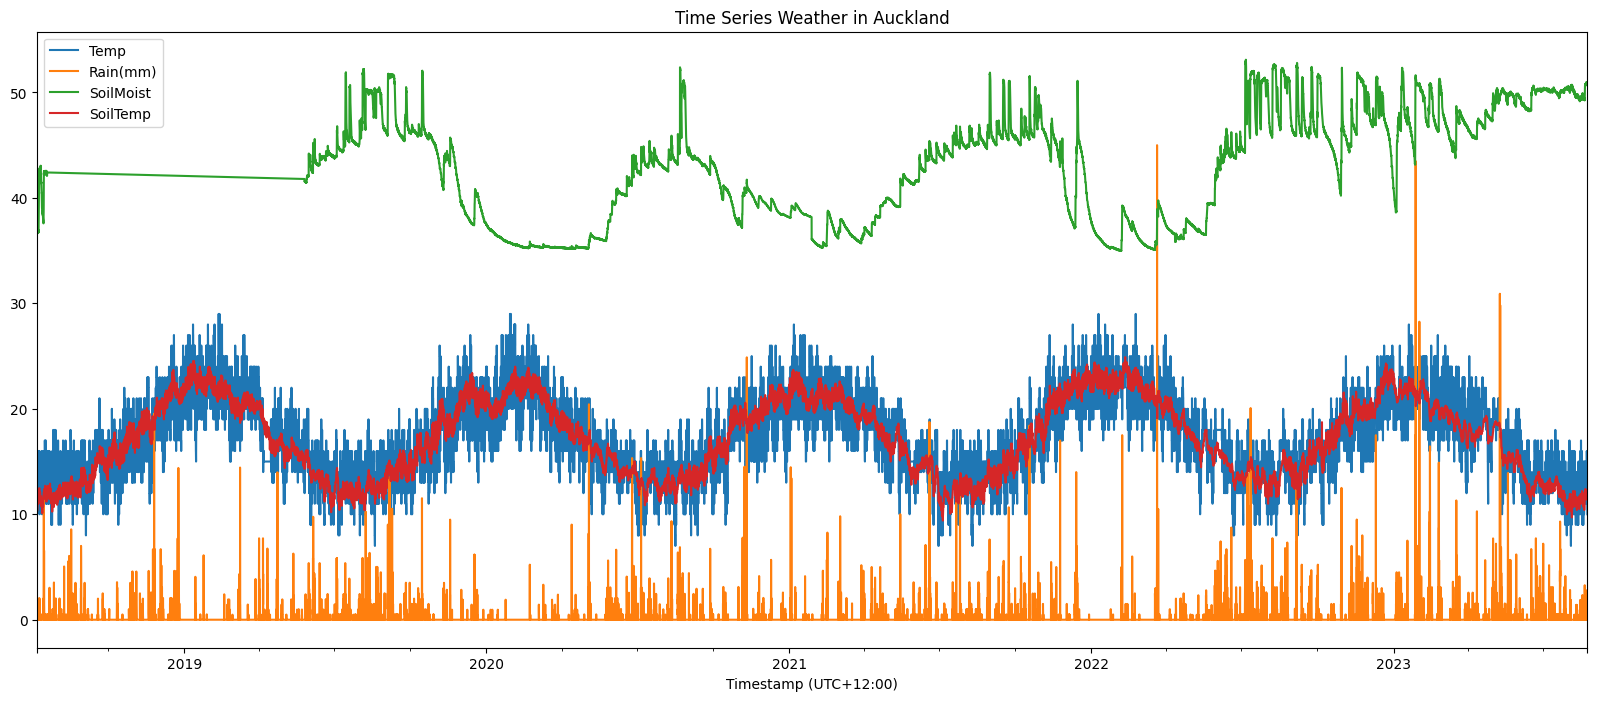

In [6]:
# Visual Inspection to choose between additive and multiplicative method for the Holt-Winters model
import matplotlib.pyplot as plt


hourly_auckland_weather.plot(title='Time Series Weather in Auckland', figsize=(20,8))
plt.show()


In [7]:
daily_auckland_weather  = hourly_auckland_weather.resample('D').mean()
monthly_means  = hourly_auckland_weather.resample('M').mean()
quater_means = hourly_auckland_weather.resample('Q').mean()
annual_means = hourly_auckland_weather.resample('A').mean()



C:\Users\Ying\AppData\Local\Temp\ipykernel_21616\835504130.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means  = hourly_auckland_weather.resample('M').mean()
C:\Users\Ying\AppData\Local\Temp\ipykernel_21616\835504130.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quater_means = hourly_auckland_weather.resample('Q').mean()
C:\Users\Ying\AppData\Local\Temp\ipykernel_21616\835504130.py:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_means = hourly_auckland_weather.resample('A').mean()


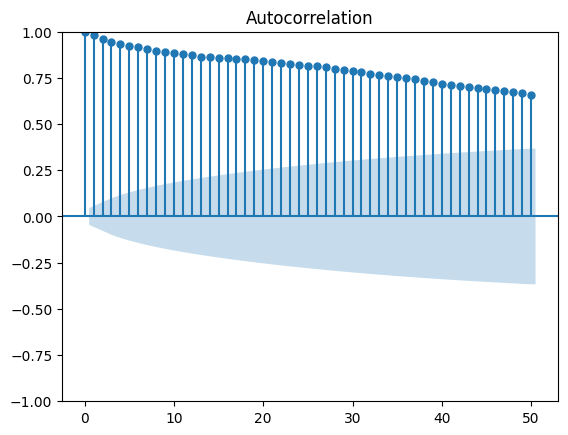

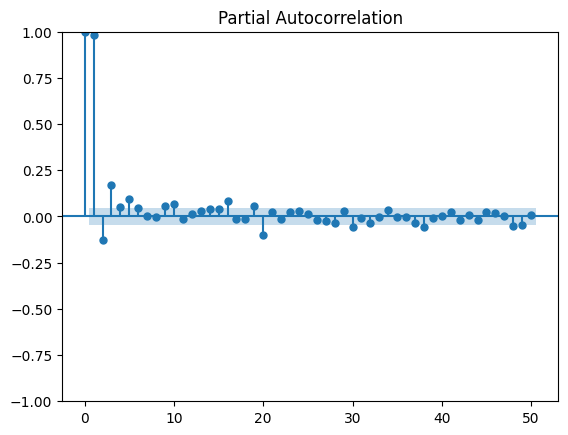

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for Soil Moisture
plot_acf(daily_auckland_weather['SoilMoist'].dropna(), lags=50)
plot_pacf(daily_auckland_weather['SoilMoist'].dropna(), lags=50)
plt.show()

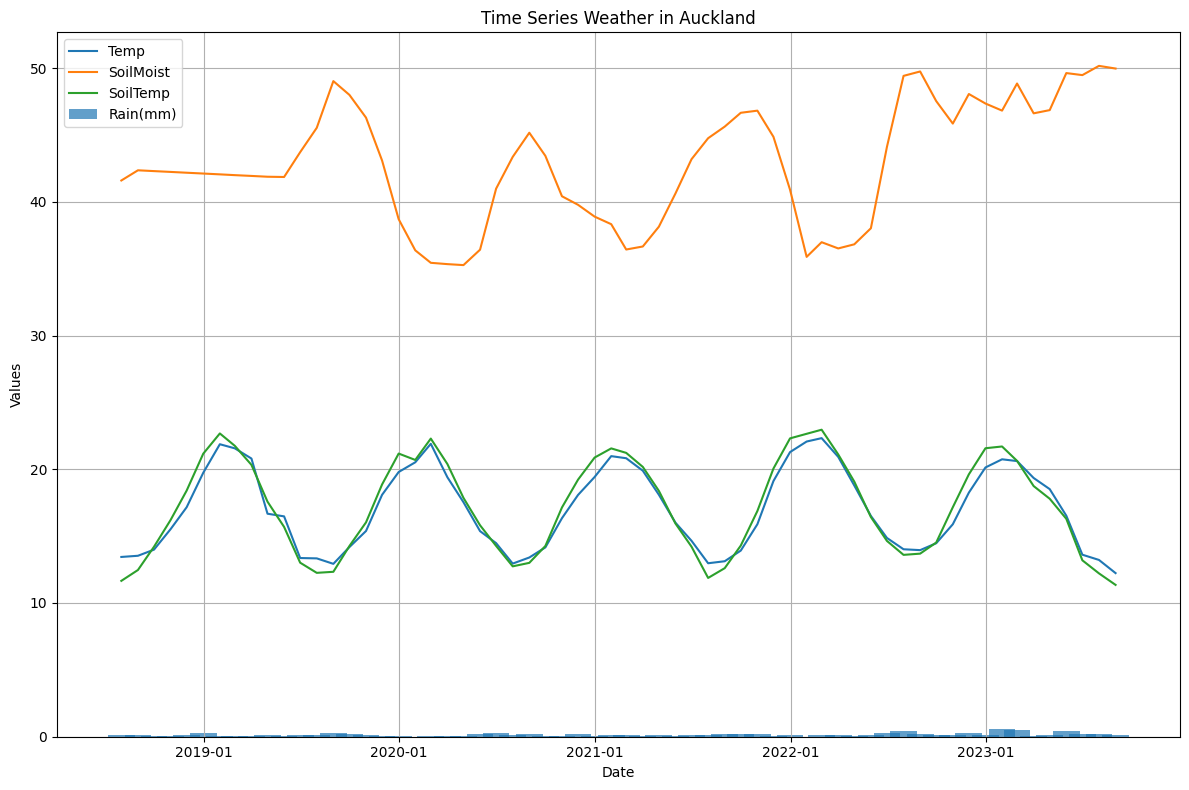

In [9]:
import matplotlib.dates as mdates

high_variable = ['WDir(Deg)', 'WSpd(m/s)','GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)']
plt.figure(figsize=(12, 8))
for column in monthly_means.columns:
    if column == 'Rain(mm)':  # Plot Rainfall as a bar plot
        plt.bar(monthly_means.index, monthly_means[column], width=50, label=column, alpha=0.7)
    elif column == high_variable:  # Plot the identified high variable separately with a different color
        plt.plot(monthly_means.index, monthly_means[column], label=f'{column} (High)', color='red')
    else:
        plt.plot(monthly_means.index, monthly_means[column], label=column)
        
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Time Series Weather in Auckland')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper left') 
plt.grid(True)

plt.tight_layout()
plt.show()

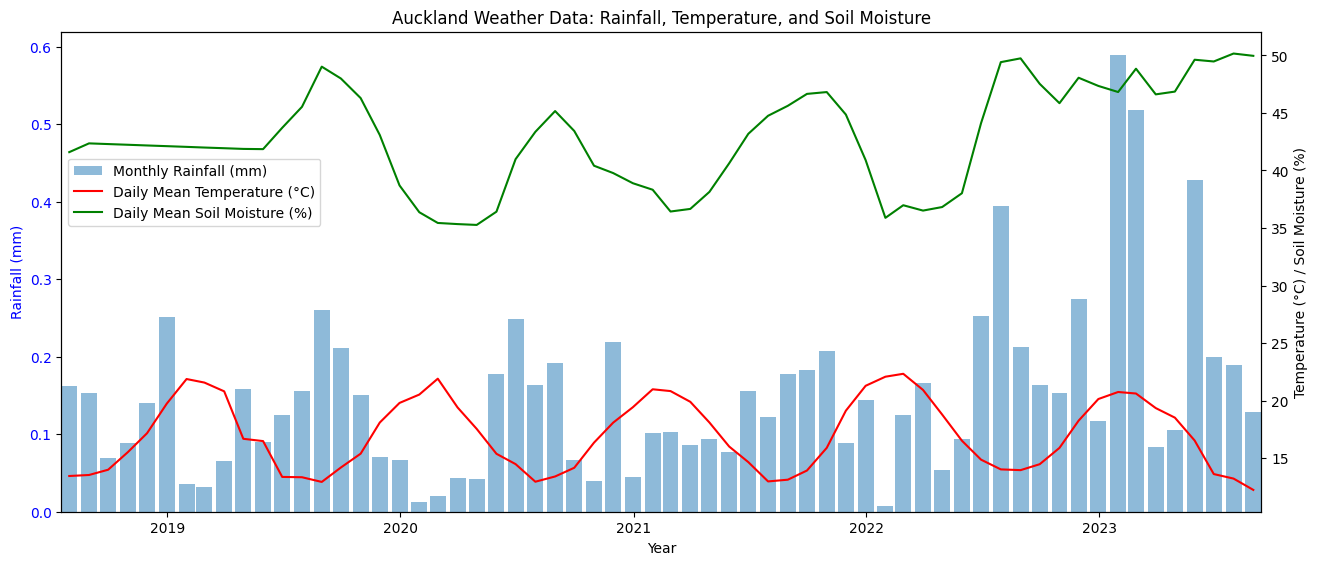

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(monthly_means.index, monthly_means['Rain(mm)'], width=25, label='Monthly Rainfall (mm)',  alpha=0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.margins(x=0)

ax2 = ax1.twinx()
ax2.plot(monthly_means.index, monthly_means['Temp'], label='Daily Mean Temperature (°C)', color='r')
ax2.plot(monthly_means.index, monthly_means['SoilMoist'], label='Daily Mean Soil Moisture (%)', color='g')
ax2.set_ylabel('Temperature (°C) / Soil Moisture (%)')
ax2.tick_params(axis='y')
ax2.margins(x=0)

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.7))
plt.xticks(rotation=45)
plt.title('Auckland Weather Data: Rainfall, Temperature, and Soil Moisture')
# plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

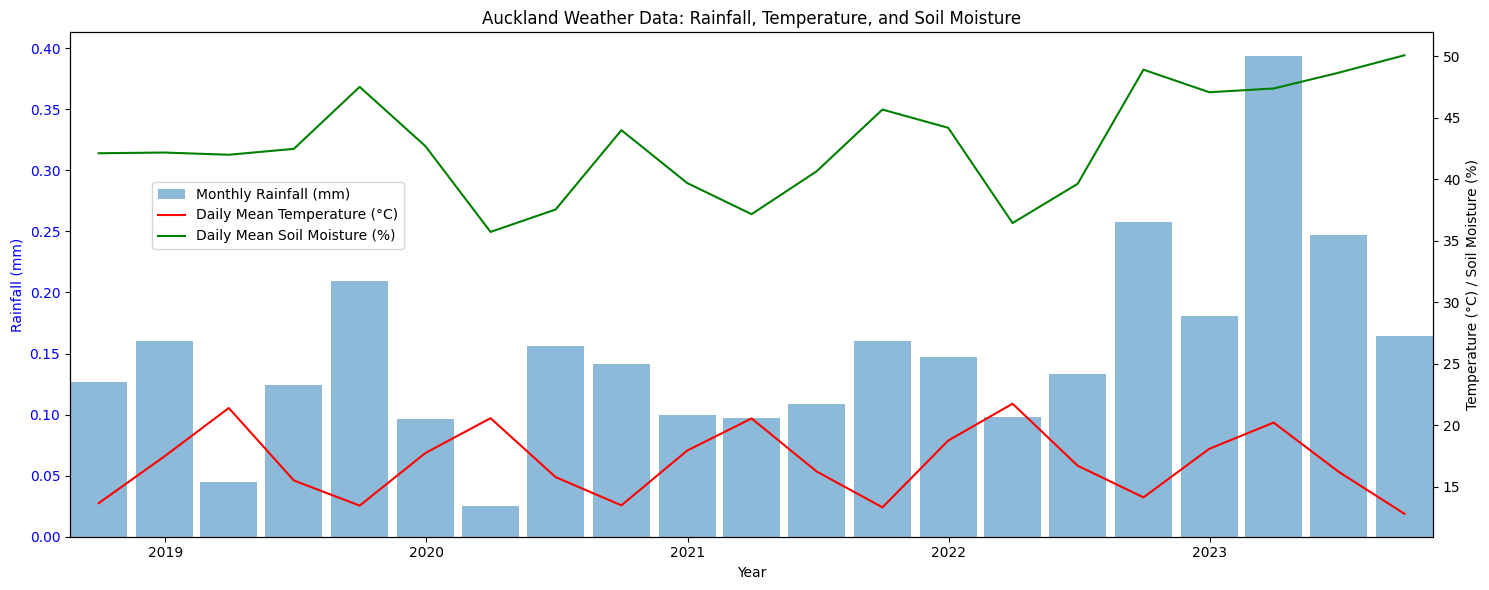

In [11]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(quater_means.index, quater_means['Rain(mm)'], width=80, label='Monthly Rainfall (mm)',  alpha=0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.margins(x=0)
ax2 = ax1.twinx()
ax2.plot(quater_means.index, quater_means['Temp'], label='Daily Mean Temperature (°C)', color='r')
ax2.plot(quater_means.index, quater_means['SoilMoist'], label='Daily Mean Soil Moisture (%)', color='g')

ax2.set_ylabel('Temperature (°C) / Soil Moisture (%)')
ax2.tick_params(axis='y')
ax2.margins(x=0)

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.7))
plt.xticks(rotation=45)
plt.title('Auckland Weather Data: Rainfall, Temperature, and Soil Moisture')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.tight_layout()
plt.show()

Basic Forecast Models

In [12]:
daily_auckland_weather.index.freq = 'D'
daily_auckland_weather.head()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2018-07-07,14.615385,0.000000,37.340846,11.051923
2018-07-08,14.416667,0.168333,36.910969,11.355208
2018-07-09,14.125000,0.189167,40.972479,12.148958
2018-07-10,12.416667,0.252083,42.747975,11.923958
2018-07-11,12.583333,0.042083,42.726773,11.413542


In [13]:
2939 /100 * 80

2351.2

In [14]:
2939 /100 * 20

587.8

In [15]:
train_data = daily_auckland_weather.iloc[:2470]
test_data = daily_auckland_weather.iloc[2469:]

In [16]:
daily_auckland_weather.columns

Index(['Temp', 'Rain(mm)', 'SoilMoist', 'SoilTemp'], dtype='object')

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

target_variable = 'SoilMoist'

fitted_model = ExponentialSmoothing(train_data[target_variable], trend='mul', seasonal='mul', seasonal_periods=90).fit()


test_predictions = fitted_model.forecast(steps=31)
test_predictions

f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2023-08-24    50.732705
2023-08-25    50.541742
2023-08-26    50.404445
2023-08-27    50.477454
2023-08-28    50.320006
2023-08-29    50.391315
2023-08-30    50.399800
2023-08-31    50.476404
2023-09-01    50.643414
2023-09-02    50.391310
2023-09-03    50.333002
2023-09-04    50.518462
2023-09-05    50.816247
2023-09-06    51.286202
2023-09-07    51.397372
2023-09-08    51.027107
2023-09-09    50.537805
2023-09-10    50.379310
2023-09-11    50.632656
2023-09-12    50.880266
2023-09-13    51.217081
2023-09-14    51.293149
2023-09-15    50.835437
2023-09-16    50.600603
2023-09-17    50.713217
2023-09-18    50.969778
2023-09-19    51.085775
2023-09-20    50.854479
2023-09-21    50.776890
2023-09-22    50.877837
2023-09-23    50.507214
Freq: D, dtype: float64

In [18]:
test_predictions.tail()

2023-09-19    51.085775
2023-09-20    50.854479
2023-09-21    50.776890
2023-09-22    50.877837
2023-09-23    50.507214
Freq: D, dtype: float64

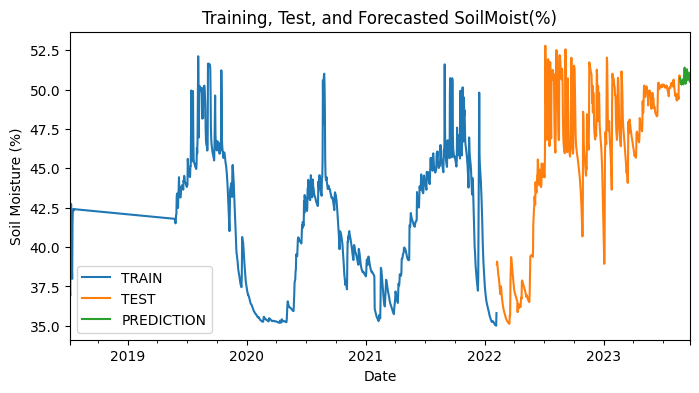

In [19]:
train_size = int(len(daily_auckland_weather) * 0.7)
train_data = daily_auckland_weather.iloc[:train_size]
test_data = daily_auckland_weather.iloc[train_size:]

train_data['SoilMoist'].plot(legend=True, label="TRAIN", figsize=(8, 4))
test_data['SoilMoist'].plot(legend=True, label="TEST")
test_predictions.plot(legend=True, label="PREDICTION")


plt.title('Training, Test, and Forecasted SoilMoist(%)')
plt.xlabel('Date')
plt.ylabel('Soil Moisture (%)')
plt.show()

In [20]:
final_model = ExponentialSmoothing(daily_auckland_weather['SoilMoist'], trend='mul', seasonal='mul', seasonal_periods=30).fit()

f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [21]:
forecast_predictions = final_model.forecast(36)

<Axes: xlabel='Timestamp (UTC+12:00)'>

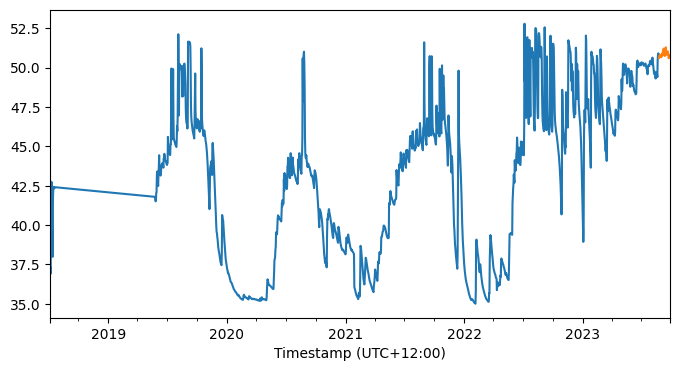

In [22]:
daily_auckland_weather['SoilMoist'].plot(figsize=(8,4))
forecast_predictions.plot()

In [23]:
# Create lag features function
def create_lag_features(data, columns, lag_days):
    for col in columns:
        for lag in lag_days:
            if lag > 0:
                data[f'lag_{col}_{lag}'] = data[col].shift(lag)
    data.dropna(inplace=True)
    return data

subset_columns = ['Rain(mm)', 'Temp']


optimal_lags = [1, 7, 14]

# Create lag features
daily_auckland_weather = create_lag_features(daily_auckland_weather, subset_columns, optimal_lags)


In [24]:
daily_auckland_weather.head()

,Temp,Rain(mm),SoilMoist,SoilTemp,lag_Rain(mm)_1,lag_Rain(mm)_7,lag_Rain(mm)_14,lag_Temp_1,lag_Temp_7,lag_Temp_14
Timestamp (UTC+12:00),,,,,,,,,,
2018-07-21,13.583333,0.000000,42.407657,11.939583,0.020833,0.126250,0.000000,13.666667,14.041667,14.615385
2018-07-22,14.083333,0.315417,42.405672,12.429167,0.000000,2.207083,0.168333,13.583333,13.791667,14.416667
2018-07-23,12.583333,0.042083,42.403687,12.001042,0.315417,0.042083,0.189167,14.083333,14.041667,14.125000
2018-07-24,11.625000,0.000000,42.401701,11.448958,0.042083,0.021250,0.252083,12.583333,13.958333,12.416667
2018-07-25,12.125000,0.062917,42.399716,10.915625,0.000000,0.000000,0.042083,11.625000,13.333333,12.583333


Choosing Arima Orders

<Axes: xlabel='Timestamp (UTC+12:00)'>

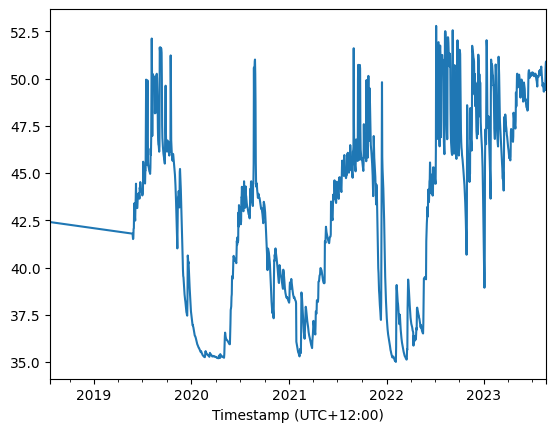

In [25]:
daily_auckland_weather['SoilMoist'].plot()
# look like a stationary data, as they is no train or seasonality

In [26]:
# to calculate if there is a trend
from statsmodels.tsa.statespace.tools import diff
daily_auckland_weather['SoilMoist'] - daily_auckland_weather['SoilMoist'].shift(1)

Timestamp (UTC+12:00)
2018-07-21         NaN
2018-07-22   -0.001985
2018-07-23   -0.001985
2018-07-24   -0.001985
2018-07-25   -0.001985
                ...   
2023-08-19   -0.185938
2023-08-20    1.101906
2023-08-21    0.347229
2023-08-22    0.059479
2023-08-23   -0.062129
Freq: D, Name: SoilMoist, Length: 1860, dtype: float64

<Axes: xlabel='Timestamp (UTC+12:00)'>

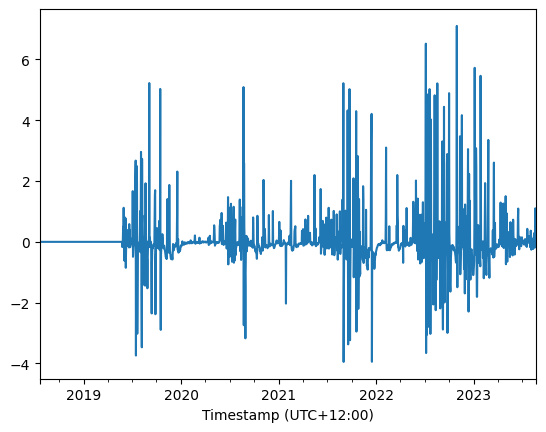

In [27]:
diff(daily_auckland_weather['SoilMoist'], k_diff=1).plot()

In [28]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

# to calculate auto correlation
acf(daily_auckland_weather['SoilMoist'])

array([1.        , 0.98319448, 0.9626345 , 0.94701794, 0.93421829,
       0.92424322, 0.91621156, 0.90822025, 0.89932124, 0.89138361,
       0.88601407, 0.88017754, 0.87361848, 0.8675543 , 0.86254764,
       0.85873585, 0.85756829, 0.85576966, 0.85175939, 0.84855381,
       0.84242104, 0.83594674, 0.83005796, 0.82522322, 0.82154926,
       0.81820929, 0.81414369, 0.8087165 , 0.80157927, 0.79564759,
       0.78882828, 0.78152054, 0.77385173])

In [29]:
pacf_yw(daily_auckland_weather['SoilMoist'], nlags=14, method='mle')

array([ 1.        ,  0.98319448, -0.12112396,  0.15258428,  0.04111529,
        0.08864116,  0.05440834,  0.01533279, -0.00420466,  0.04798906,
        0.07526022, -0.01808712,  0.00845769,  0.02515171,  0.04032454])

In [30]:
pacf_yw(daily_auckland_weather['SoilMoist'], nlags=14, method='mle')

array([ 1.        ,  0.98319448, -0.12112396,  0.15258428,  0.04111529,
        0.08864116,  0.05440834,  0.01533279, -0.00420466,  0.04798906,
        0.07526022, -0.01808712,  0.00845769,  0.02515171,  0.04032454])

In [31]:
pacf_ols(daily_auckland_weather['SoilMoist'], nlags=14)

array([ 1.        ,  0.98478673, -0.12605533,  0.16177312,  0.03993059,
        0.08844195,  0.05991109,  0.01546844, -0.00489603,  0.05243546,
        0.07727652, -0.01781442,  0.01182222,  0.02794619,  0.04264613])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

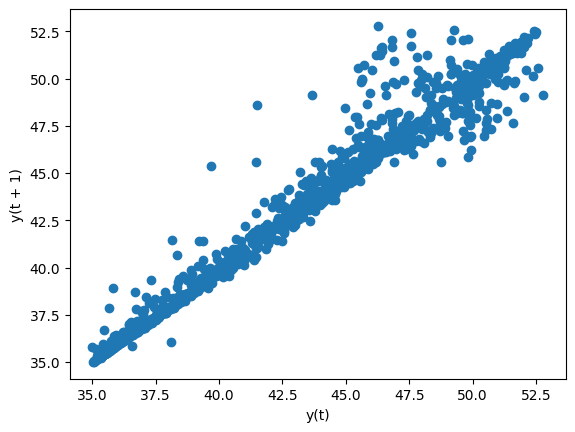

In [32]:
from pandas.plotting import lag_plot
lag_plot(daily_auckland_weather['SoilMoist'])
# ths show very strong of auto correlation --> non stationery dataset

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

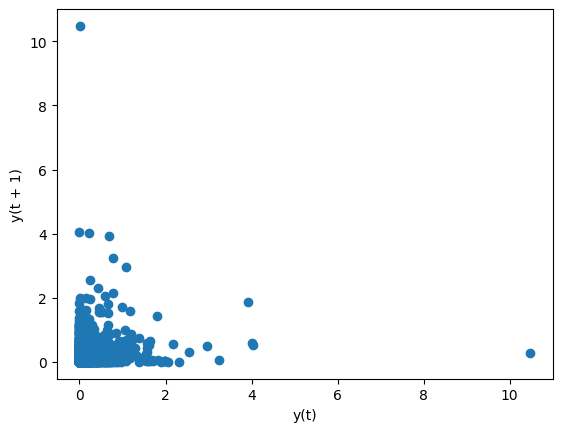

In [33]:
lag_plot(daily_auckland_weather['Rain(mm)'])


In [34]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [35]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [36]:
stepwise_fit = auto_arima(daily_auckland_weather['SoilMoist'], 
                           start_P=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4498.672, Time=2.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4574.840, Time=0.78 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4551.255, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4540.012, Time=2.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4572.896, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4496.588, Time=2.95 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=4482.006, Time=3.44 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=4476.155, Time=5.53 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=4477.397, Time=6.58 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=4462.793, Time=38.47 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4462.186, Time=22.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4461.872, Time=21.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4468.495, Time=14.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4461.622, Time=41.36 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4459.665, Time=20.92 sec
 ARI

In [37]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1860
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -2224.334
Date:                Sat, 29 Jun 2024   AIC                           4456.667
Time:                        02:04:02   BIC                           4478.778
Sample:                    07-21-2018   HQIC                          4464.816
                         - 08-23-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6898      0.025     27.126      0.000       0.640       0.740
ma.L1         -0.5780      0.028    -20.373      0.000      -0.634      -0.522
ma.L2         -0.2517      0.012    -21.108      0.000      -0.275      -0.228
sigma2         0.6409      0.007     90.290      0.000       0.627       0.655
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             27979.64
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               3.39   Skew:                             2.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
stepwise_fit = auto_arima(daily_auckland_weather['SoilMoist'], start_P=0, start_q=0, max_p=6, max_q=3, seasonal=True, trace=True)

Performing stepwise search to minimize aic


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4498.672, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4574.840, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4551.255, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4540.012, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4572.896, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4496.588, Time=1.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=4482.006, Time=1.87 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=4476.155, Time=2.60 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=4477.397, Time=3.18 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=4462.793, Time=15.88 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4462.186, Time=7.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4461.872, Time=7.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4468.495, Time=4.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4461.622, Time=14.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4459.665, Time=8.84 sec
 ARIMA(1

In [39]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1860
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -2224.334
Date:                Sat, 29 Jun 2024   AIC                           4456.667
Time:                        02:06:21   BIC                           4478.778
Sample:                    07-21-2018   HQIC                          4464.816
                         - 08-23-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6898      0.025     27.126      0.000       0.640       0.740
ma.L1         -0.5780      0.028    -20.373      0.000      -0.634      -0.522
ma.L2         -0.2517      0.012    -21.108      0.000      -0.275      -0.228
sigma2         0.6409      0.007     90.290      0.000       0.627       0.655
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             27979.64
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               3.39   Skew:                             2.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(daily_auckland_weather['SoilMoist'], start_p=0, start_q=0, max_p=0,max_q=4, seasonal=True, trace=True, m=14)

KeyError: 'SoilMoist(%)'

In [40]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1860
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -2224.334
Date:                Sat, 29 Jun 2024   AIC                           4456.667
Time:                        02:06:21   BIC                           4478.778
Sample:                    07-21-2018   HQIC                          4464.816
                         - 08-23-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6898      0.025     27.126      0.000       0.640       0.740
ma.L1         -0.5780      0.028    -20.373      0.000      -0.634      -0.522
ma.L2         -0.2517      0.012    -21.108      0.000      -0.275      -0.228
sigma2         0.6409      0.007     90.290      0.000       0.627       0.655
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             27979.64
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               3.39   Skew:                             2.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

the ARIMA(0,1,1)(1,0,1)[30] Model has the lowest AIC among the three tested models

In [41]:
daily_auckland_weather.head()

,Temp,Rain(mm),SoilMoist,SoilTemp,lag_Rain(mm)_1,lag_Rain(mm)_7,lag_Rain(mm)_14,lag_Temp_1,lag_Temp_7,lag_Temp_14
Timestamp (UTC+12:00),,,,,,,,,,
2018-07-21,13.583333,0.000000,42.407657,11.939583,0.020833,0.126250,0.000000,13.666667,14.041667,14.615385
2018-07-22,14.083333,0.315417,42.405672,12.429167,0.000000,2.207083,0.168333,13.583333,13.791667,14.416667
2018-07-23,12.583333,0.042083,42.403687,12.001042,0.315417,0.042083,0.189167,14.083333,14.041667,14.125000
2018-07-24,11.625000,0.000000,42.401701,11.448958,0.042083,0.021250,0.252083,12.583333,13.958333,12.416667
2018-07-25,12.125000,0.062917,42.399716,10.915625,0.000000,0.000000,0.042083,11.625000,13.333333,12.583333


# ARMA

<Axes: xlabel='Timestamp (UTC+12:00)'>

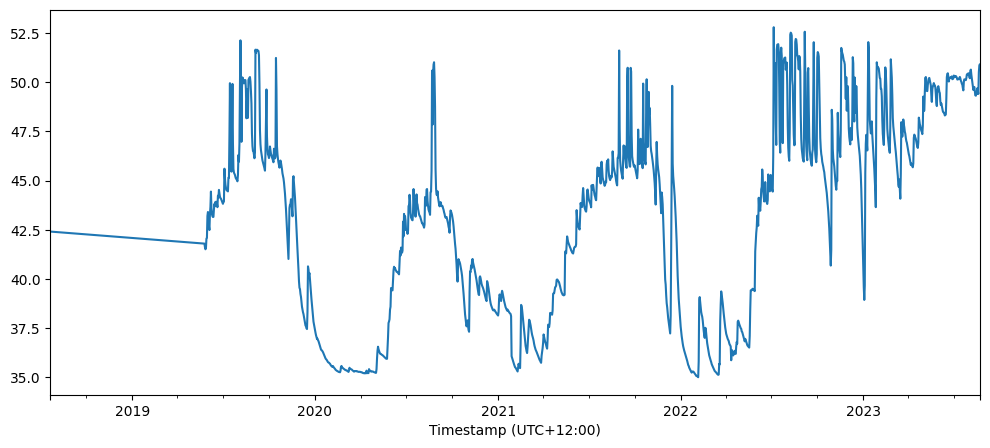

In [42]:
from statsmodels.tsa.arima_model import ARIMA, ARMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

# to determind to look for p and q
daily_auckland_weather['SoilMoist'].plot(figsize=(12,5))

In [43]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    
    labels = ['AD test statistic', 'p-value', '#lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no uni root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to Reject the null hypothesis")
        print("Data has no uni root and is non-stationary")

In [44]:
adf_test(daily_auckland_weather['SoilMoist'])

Augmented Dickey-Fuller Test: 
AD test statistic         -1.832307
p-value                    0.364544
#lags used                20.000000
# observations          1839.000000
critical value (1%)       -3.433911
critical value (5%)       -2.863113
critical value (10%)      -2.567607
Weak evidence against the null hypothesis
Fail to Reject the null hypothesis
Data has no uni root and is non-stationary


In [45]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_size = int(len(daily_auckland_weather) * 0.8)

train, test = daily_auckland_weather['SoilMoist'][:train_size], daily_auckland_weather['SoilMoist'][train_size:]
model = ARIMA(train, order=(1, 1, 2)) 
results = model.fit()

forecast = results.forecast(steps=len(test))


rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
r2 = r2_score(test, forecast)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Root Mean Squared Error (RMSE): 2.384598139171106
Mean Absolute Error (MAE): 1.959451270099444
Mean Squared Error (MSE): 5.686308285338302
R2 Score: -0.008158118741333986


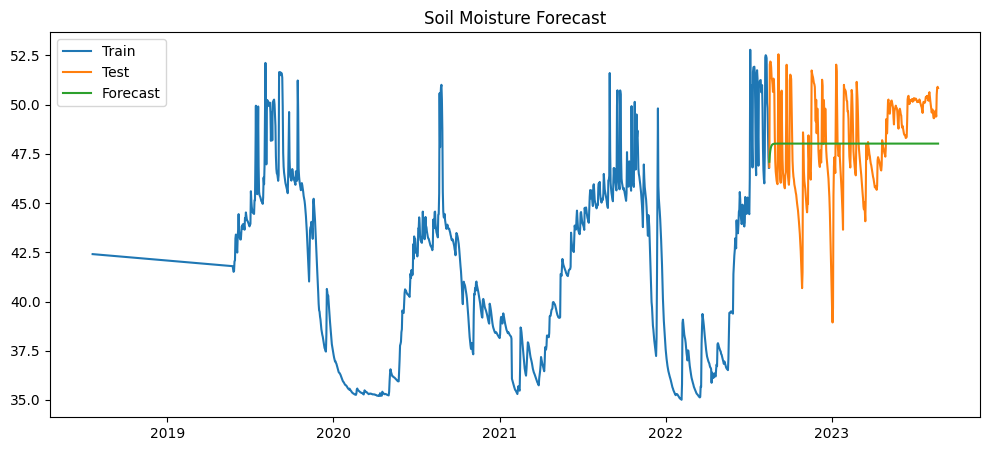

In [46]:
plt.figure(figsize=(12, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='best')
plt.title('Soil Moisture Forecast')
plt.show()

SARIMA RMSE: 2.385672900024151
SARIMA Mean Absolute Error (MAE): 1.959451270099444
SARIMA Mean Squared Error (MSE): 5.686308285338302
SARIMA R2 Score: -0.008158118741333986


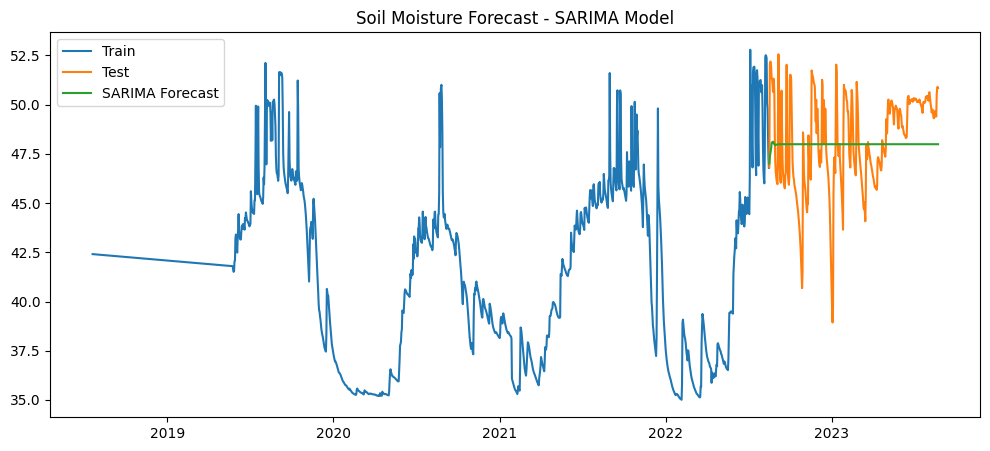

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(train, order=(1, 1, 2), seasonal_order=(0, 0, 1, 14))
results_sarima = model_sarima.fit()

forecast_sarima = results_sarima.forecast(steps=len(test))
rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))
mae_sarima = mean_absolute_error(test, forecast)
mse_sarima = mean_squared_error(test, forecast)
r2_sarima = r2_score(test, forecast)
print(f"SARIMA RMSE: {rmse_sarima}")
print("SARIMA Mean Absolute Error (MAE):", mae_sarima)
print("SARIMA Mean Squared Error (MSE):", mse_sarima)
print("SARIMA R2 Score:", r2_sarima)


plt.figure(figsize=(12, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast_sarima, label='SARIMA Forecast')
plt.legend(loc='best')
plt.title('Soil Moisture Forecast - SARIMA Model')
plt.show()

In [50]:
time_steps = 14 